<a href="https://colab.research.google.com/github/Argivist/Group6_SportsPrediction/blob/master/FifaDatasetPredictionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U scikit-learn

imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error

correlationLimit=0.48230737028657543
imputer=SimpleImputer(strategy='mean')
scaler=StandardScaler()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data PreProcessing and feature engineering**


In [ ]:
fifa_21 = pd.read_csv('//content//drive//My Drive//Intro to AI//players_21.csv')
fifa_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


In [ ]:
list(fifa_21.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [ ]:
fifa_21.info()
fifa_21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 15.9+ MB


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,张梦炫,CB,47,52,70000.0,1000.0,21,...,47+2,47+2,47+2,45+2,15+2,https://cdn.sofifa.net/players/257/710/21_120.png,https://cdn.sofifa.net/teams/112165/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18940,257933,https://sofifa.com/player/257933/wenzhuo-huang...,Huang Wenzhou,黄文卓,CM,47,53,70000.0,1000.0,21,...,46+2,46+2,46+2,47+2,15+2,https://cdn.sofifa.net/players/257/933/21_120.png,https://cdn.sofifa.net/teams/112540/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18941,257936,https://sofifa.com/player/257936/yue-song/210002,Song Yue,宋岳,CM,47,47,45000.0,2000.0,28,...,46+1,46+1,46+1,47,11+2,https://cdn.sofifa.net/players/257/936/21_120.png,https://cdn.sofifa.net/teams/111774/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
18942,258736,https://sofifa.com/player/258736/vani-da-silva...,V. Da Silva,Ivanilson Loforte Tique Da Silva,ST,47,67,130000.0,500.0,17,...,26+2,26+2,26+2,33+2,14+2,https://cdn.sofifa.net/players/258/736/21_120.png,https://cdn.sofifa.net/teams/1920/60.png,https://cdn.sofifa.net/flags/gb-eng.png,NaN,https://cdn.sofifa.net/flags/gb-eng.png


In [ ]:
fifa_22 = pd.read_csv('//content//drive//My Drive//Intro to AI//players_22.csv')
fifa_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


<ipython-input-60-a19a431b5782>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_22 = pd.read_csv('//content//drive//My Drive//Intro to AI//players_22.csv')


Data processing

In [ ]:
datasets=[fifa_21,fifa_22]
#processing the base and boost rating
for d in [fifa_21,fifa_22]:
  positions="ls	st	rs	lw	lf	cf	rf	rw	lam	cam	ram	lm	lcm	cm	rcm	rm	lwb	ldm	cdm	rdm	rwb	lb	lcb	cb	rcb	rb	gk"
  positions_list = positions.split("\t")
  for i in positions_list:
    a=d[i]
    d[i+'_base']=a.str.split('+', 1).str[0]
    d[i+'_effective']=a.str.split('+', 1).str[1]
    a=d[i+'_base']
    d[i+'_base']=a.str.split('-', 1).str[0]
    d[i+'_effectiven']=+a.str.split('-', 1).str[1]
    d[i+'_effective'].fillna("0",inplace=True)
    d[i+'_effectiven'].fillna("0",inplace=True)
    d[i+"_base"]=pd.to_numeric(fifa_21[i+"_base"])
    d[i+"_effective"]=d[i+"_base"]+pd.to_numeric(d[i+"_effective"])-pd.to_numeric(d[i+"_effectiven"])
    d.drop([i,i+'_effectiven'],axis=1,inplace=True)

<ipython-input-61-f1e8342c6432>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  d[i+'_base']=a.str.split('+', 1).str[0]
<ipython-input-61-f1e8342c6432>:9: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  d[i+'_effective']=a.str.split('+', 1).str[1]
<ipython-input-61-f1e8342c6432>:11: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  d[i+'_base']=a.str.split('-', 1).str[0]
<ipython-input-61-f1e8342c6432>:12: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  d[i+'_effectiven']=+a.str.split('-', 1).str[1]
<ipython-input-61-f1e8342c6432>:8: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument '

In [ ]:
for i in [fifa_21,fifa_22]:
  i.drop(['sofifa_id',
'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'weak_foot',
 'body_type',
 'real_face',
'player_tags',
 'player_traits',
'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url'], axis = 1, inplace = True,errors='ignore')

encoding and imputing


In [ ]:
fifa_21o=pd.DataFrame(fifa_21.select_dtypes(include=['object']))
fifa_22o=pd.DataFrame(fifa_22.select_dtypes(include=['object']))

In [ ]:
fifa_22o.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   player_positions  19239 non-null  object
 1   nationality_name  19239 non-null  object
 2   preferred_foot    19239 non-null  object
 3   work_rate         19239 non-null  object
dtypes: object(4)
memory usage: 601.3+ KB


In [ ]:
fifa_21.drop(fifa_21.select_dtypes(include=['object']),axis=1,inplace=True)
fifa_22.drop(fifa_22.select_dtypes(include=['object']),axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in fifa_21o.columns:
  fifa_21o[i]=le.fit_transform(fifa_21o[i])
  fifa_22o[i]=le.fit_transform(fifa_22o[i])

In [ ]:
fifa_21=pd.DataFrame(imputer.fit_transform(fifa_21),columns=fifa_21.columns)
fifa_22=pd.DataFrame(imputer.fit_transform(fifa_22),columns=fifa_22.columns)


In [ ]:
fifa_21=pd.concat([fifa_21,fifa_21o],axis=1)
fifa_22=pd.concat([fifa_22,fifa_22o],axis=1)
fifa_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Columns: 108 entries, overall to work_rate
dtypes: float64(104), int64(4)
memory usage: 15.6 MB


In [ ]:
fifa_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 108 entries, overall to work_rate
dtypes: float64(104), int64(4)
memory usage: 15.9 MB


scaling

In [ ]:
#scaling
f21ov=pd.DataFrame(fifa_21['overall'])
fifa_21.drop(['overall'],inplace=True,axis=1)
#fifa_21.to_csv('DataForScaling.csv',index=False)
scaler.fit(fifa_21)
original=fifa_21

fifa_21=pd.DataFrame(scaler.transform(fifa_21),columns=fifa_21.columns)
fifa_21=pd.concat([fifa_21,f21ov],axis=1)

f22ov=pd.DataFrame(fifa_22['overall'],columns=['overall'])
fifa_22.drop(['overall'],inplace=True,axis=1)
fifa_22=pd.DataFrame(scaler.transform(fifa_22),columns=fifa_22.columns)
fifa_22=pd.concat([fifa_22,f22ov],axis=1)



In [ ]:
fifa_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 108 entries, potential to overall
dtypes: float64(108)
memory usage: 15.9 MB


In [ ]:
fifa_22

,potential,value_eur,wage_eur,height_cm,weight_kg,skill_moves,international_reputation,release_clause_eur,pace,shooting,...,rcb_effective,rb_base,rb_effective,gk_base,gk_effective,player_positions,nationality_name,preferred_foot,work_rate,overall
0,3.586563,9.759315,15.720109,-1.639556,-0.427506,2.135802,10.801035,14.298250,1.672470,3.009606,...,0.060216,0.622566,0.695895,-0.153779,-0.087330,1.924085,-1.506000,-1.79263,0.439865,93.0
1,3.422893,15.152443,13.191553,0.558088,0.847832,2.135802,10.801035,19.700805,0.996993,3.009606,...,0.196682,0.551203,0.624453,-0.087867,-0.020972,2.093539,0.907801,0.55784,-1.300995,92.0
2,3.259222,5.470804,13.191553,0.851107,1.131240,3.440521,10.801035,8.068460,1.865464,3.161128,...,0.606081,0.551203,0.624453,-0.153779,-0.087330,2.219264,0.928432,0.55784,-1.649167,91.0
3,3.259222,16.387015,13.191553,-0.907008,-0.994323,3.440521,10.801035,23.939104,2.251450,2.327758,...,-0.144484,0.622566,0.695895,-0.087867,-0.020972,0.655908,-1.217169,0.55784,-1.300995,91.0
4,3.259222,15.932173,17.237243,-0.027950,-0.710915,2.135802,8.037314,23.275274,0.804000,2.555040,...,1.220180,1.550287,1.624640,-0.021955,0.045386,-0.459212,-1.361584,0.55784,-1.997338,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,-3.123941,-0.368070,-0.412078,-0.174460,-1.561140,-0.473636,-0.253847,-0.427134,-0.932941,-1.308766,...,-0.000076,0.000000,0.000437,0.000000,0.000004,-0.841852,-1.010861,0.55784,0.788037,47.0
19235,-1.978245,-0.362872,-0.437363,-0.907008,-0.710915,-0.473636,-0.253847,-0.419066,-0.836444,-1.005723,...,-0.000076,0.000000,0.000437,0.000000,0.000004,-0.464679,0.969693,0.55784,0.788037,47.0
19236,-2.632929,-0.364171,-0.437363,-0.467479,-0.427506,-0.473636,-0.253847,-0.420904,-0.739947,-1.157245,...,-0.000076,0.000000,0.000437,0.000000,0.000004,-0.464679,0.969693,0.55784,0.788037,47.0
19237,-1.814574,-0.362872,-0.437363,-1.200027,-1.277731,-0.473636,-0.253847,-0.414368,0.032026,-0.475396,...,-0.000076,0.000000,0.000437,0.000000,0.000004,2.093539,0.969693,0.55784,0.788037,47.0


**Creating Feature Subsets That Show Maximum Correlation With the Overall Rating**

Correlation

In [ ]:
pd.DataFrame(fifa_21.corr(numeric_only=True)['overall'].sort_values(ascending=False))

,overall
overall,1.000000
movement_reactions,0.867234
mentality_composure,0.705252
passing,0.662090
potential,0.636366
...,...
goalkeeping_diving,0.003128
goalkeeping_kicking,-0.000512
nationality_name,-0.046919
preferred_foot,-0.052533


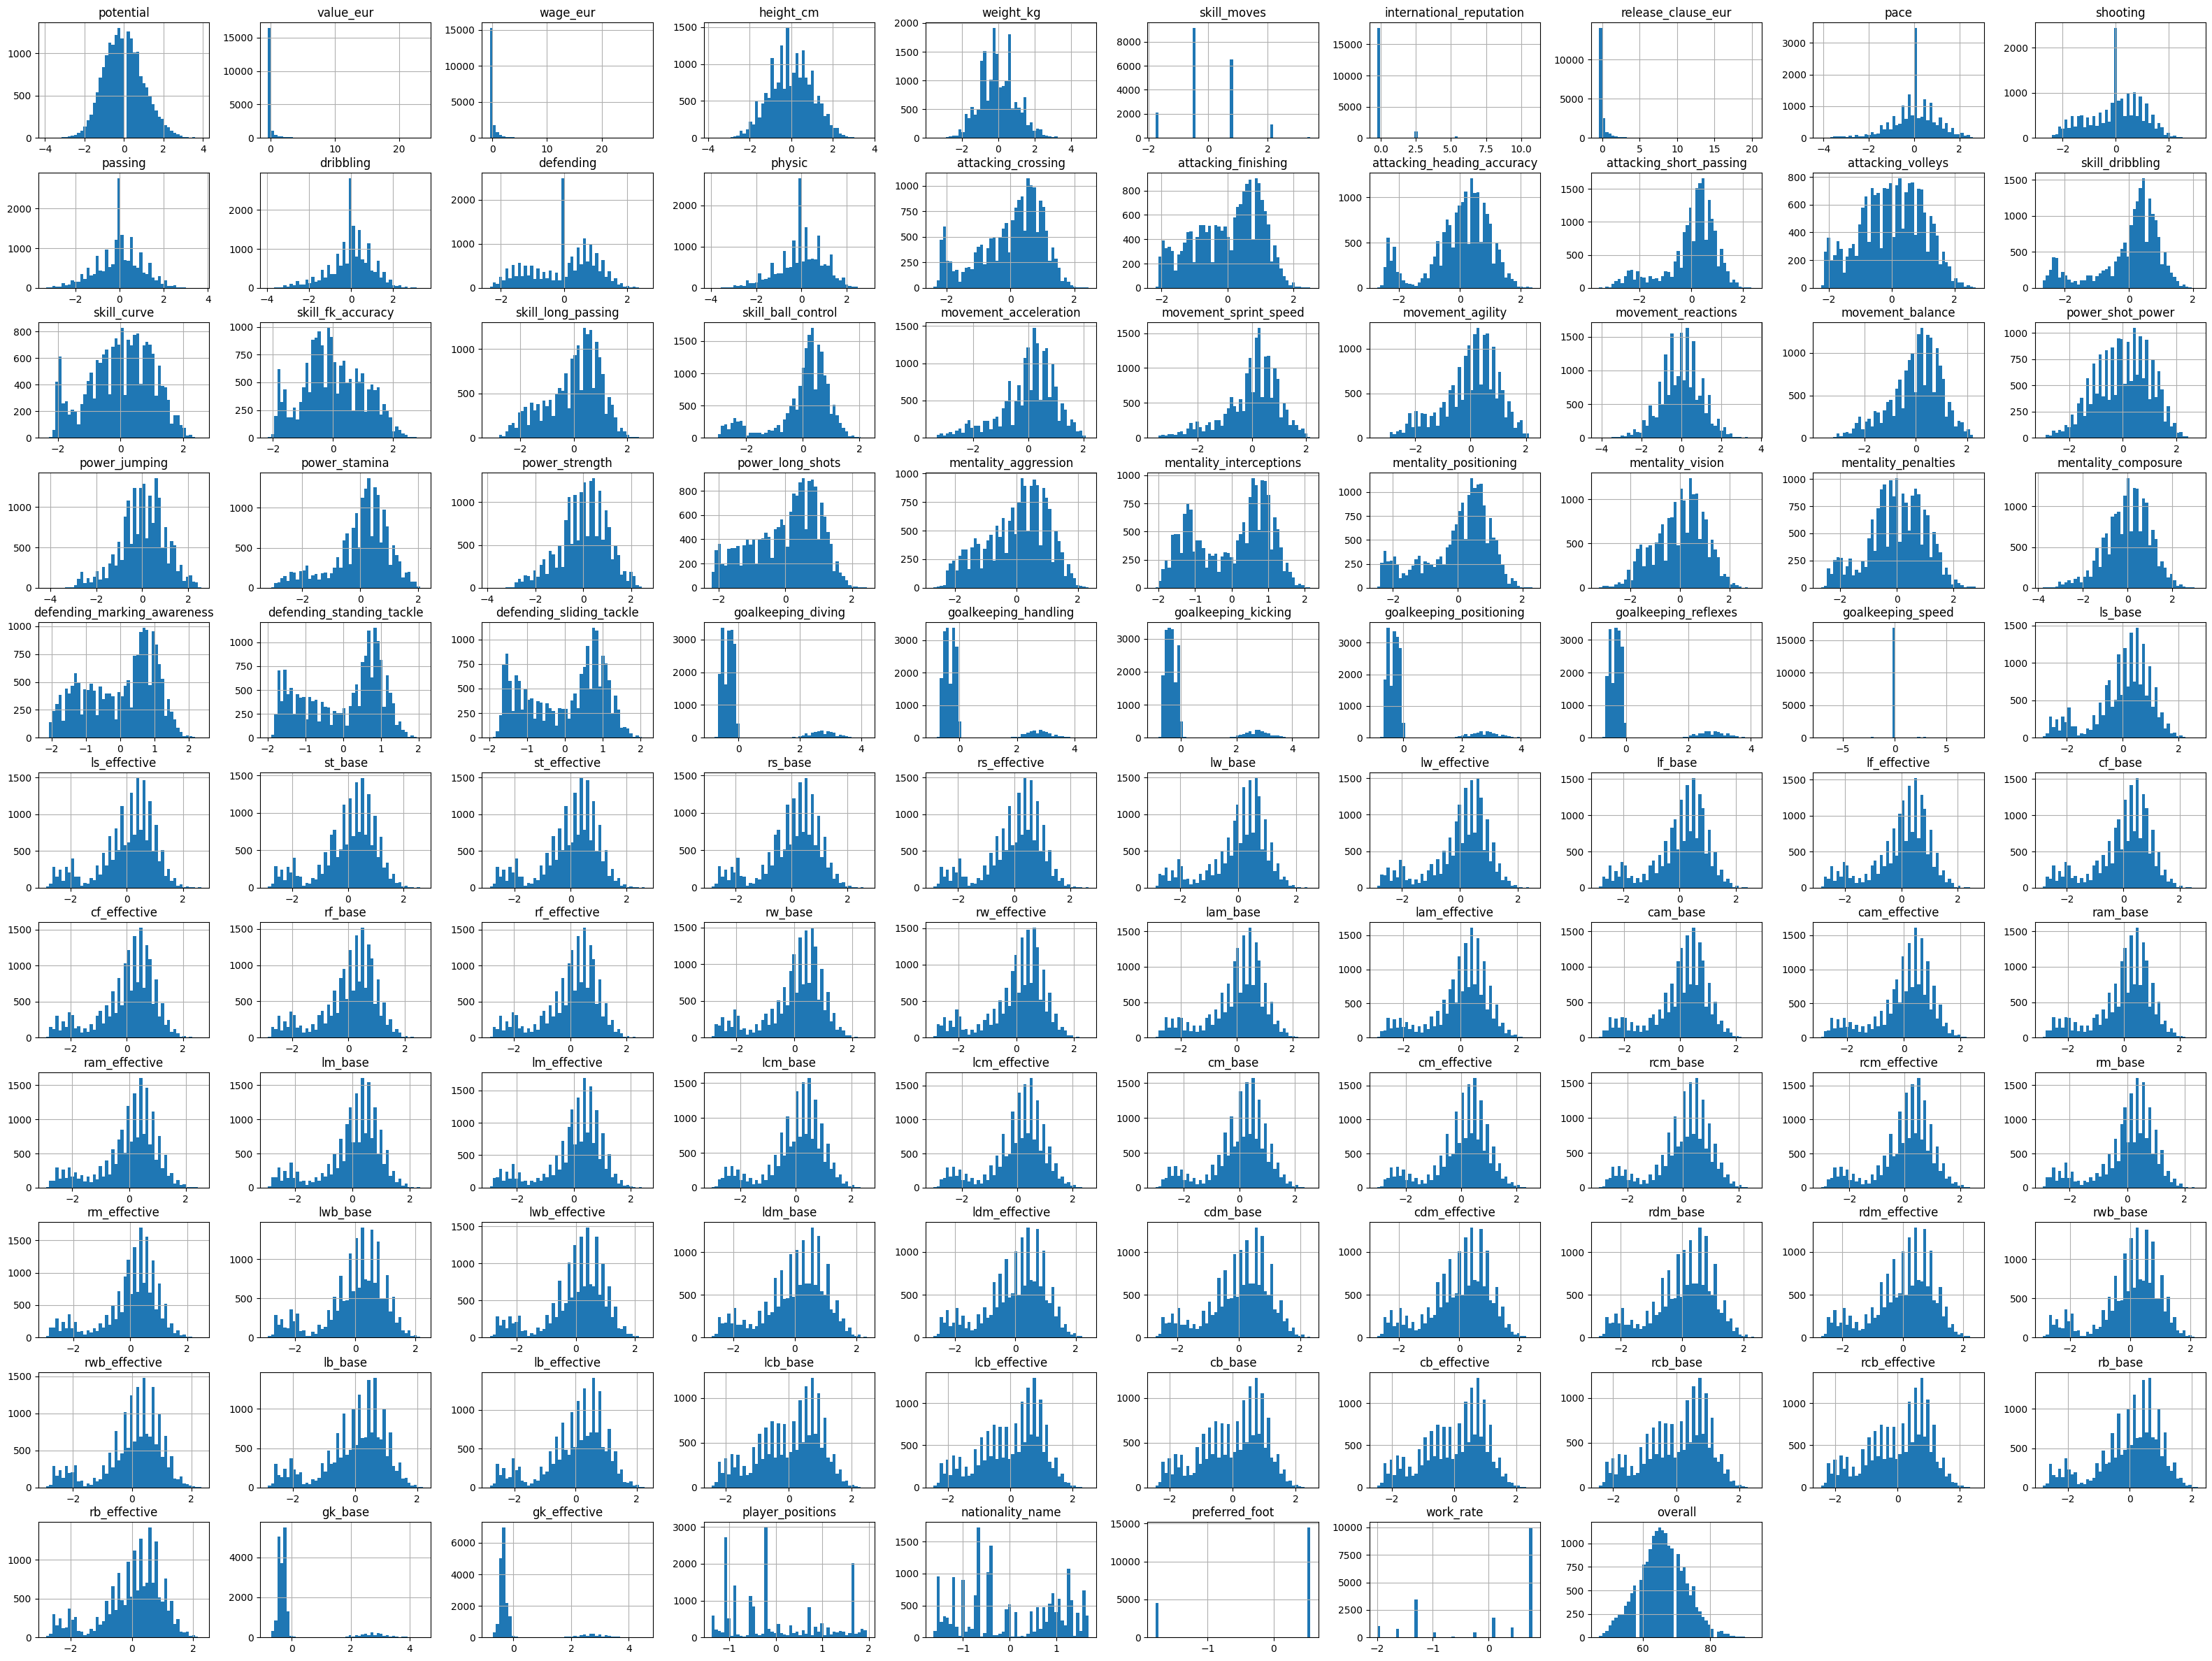

In [ ]:
fifa_21.hist(bins=50,figsize=(40,30))
plt.show()

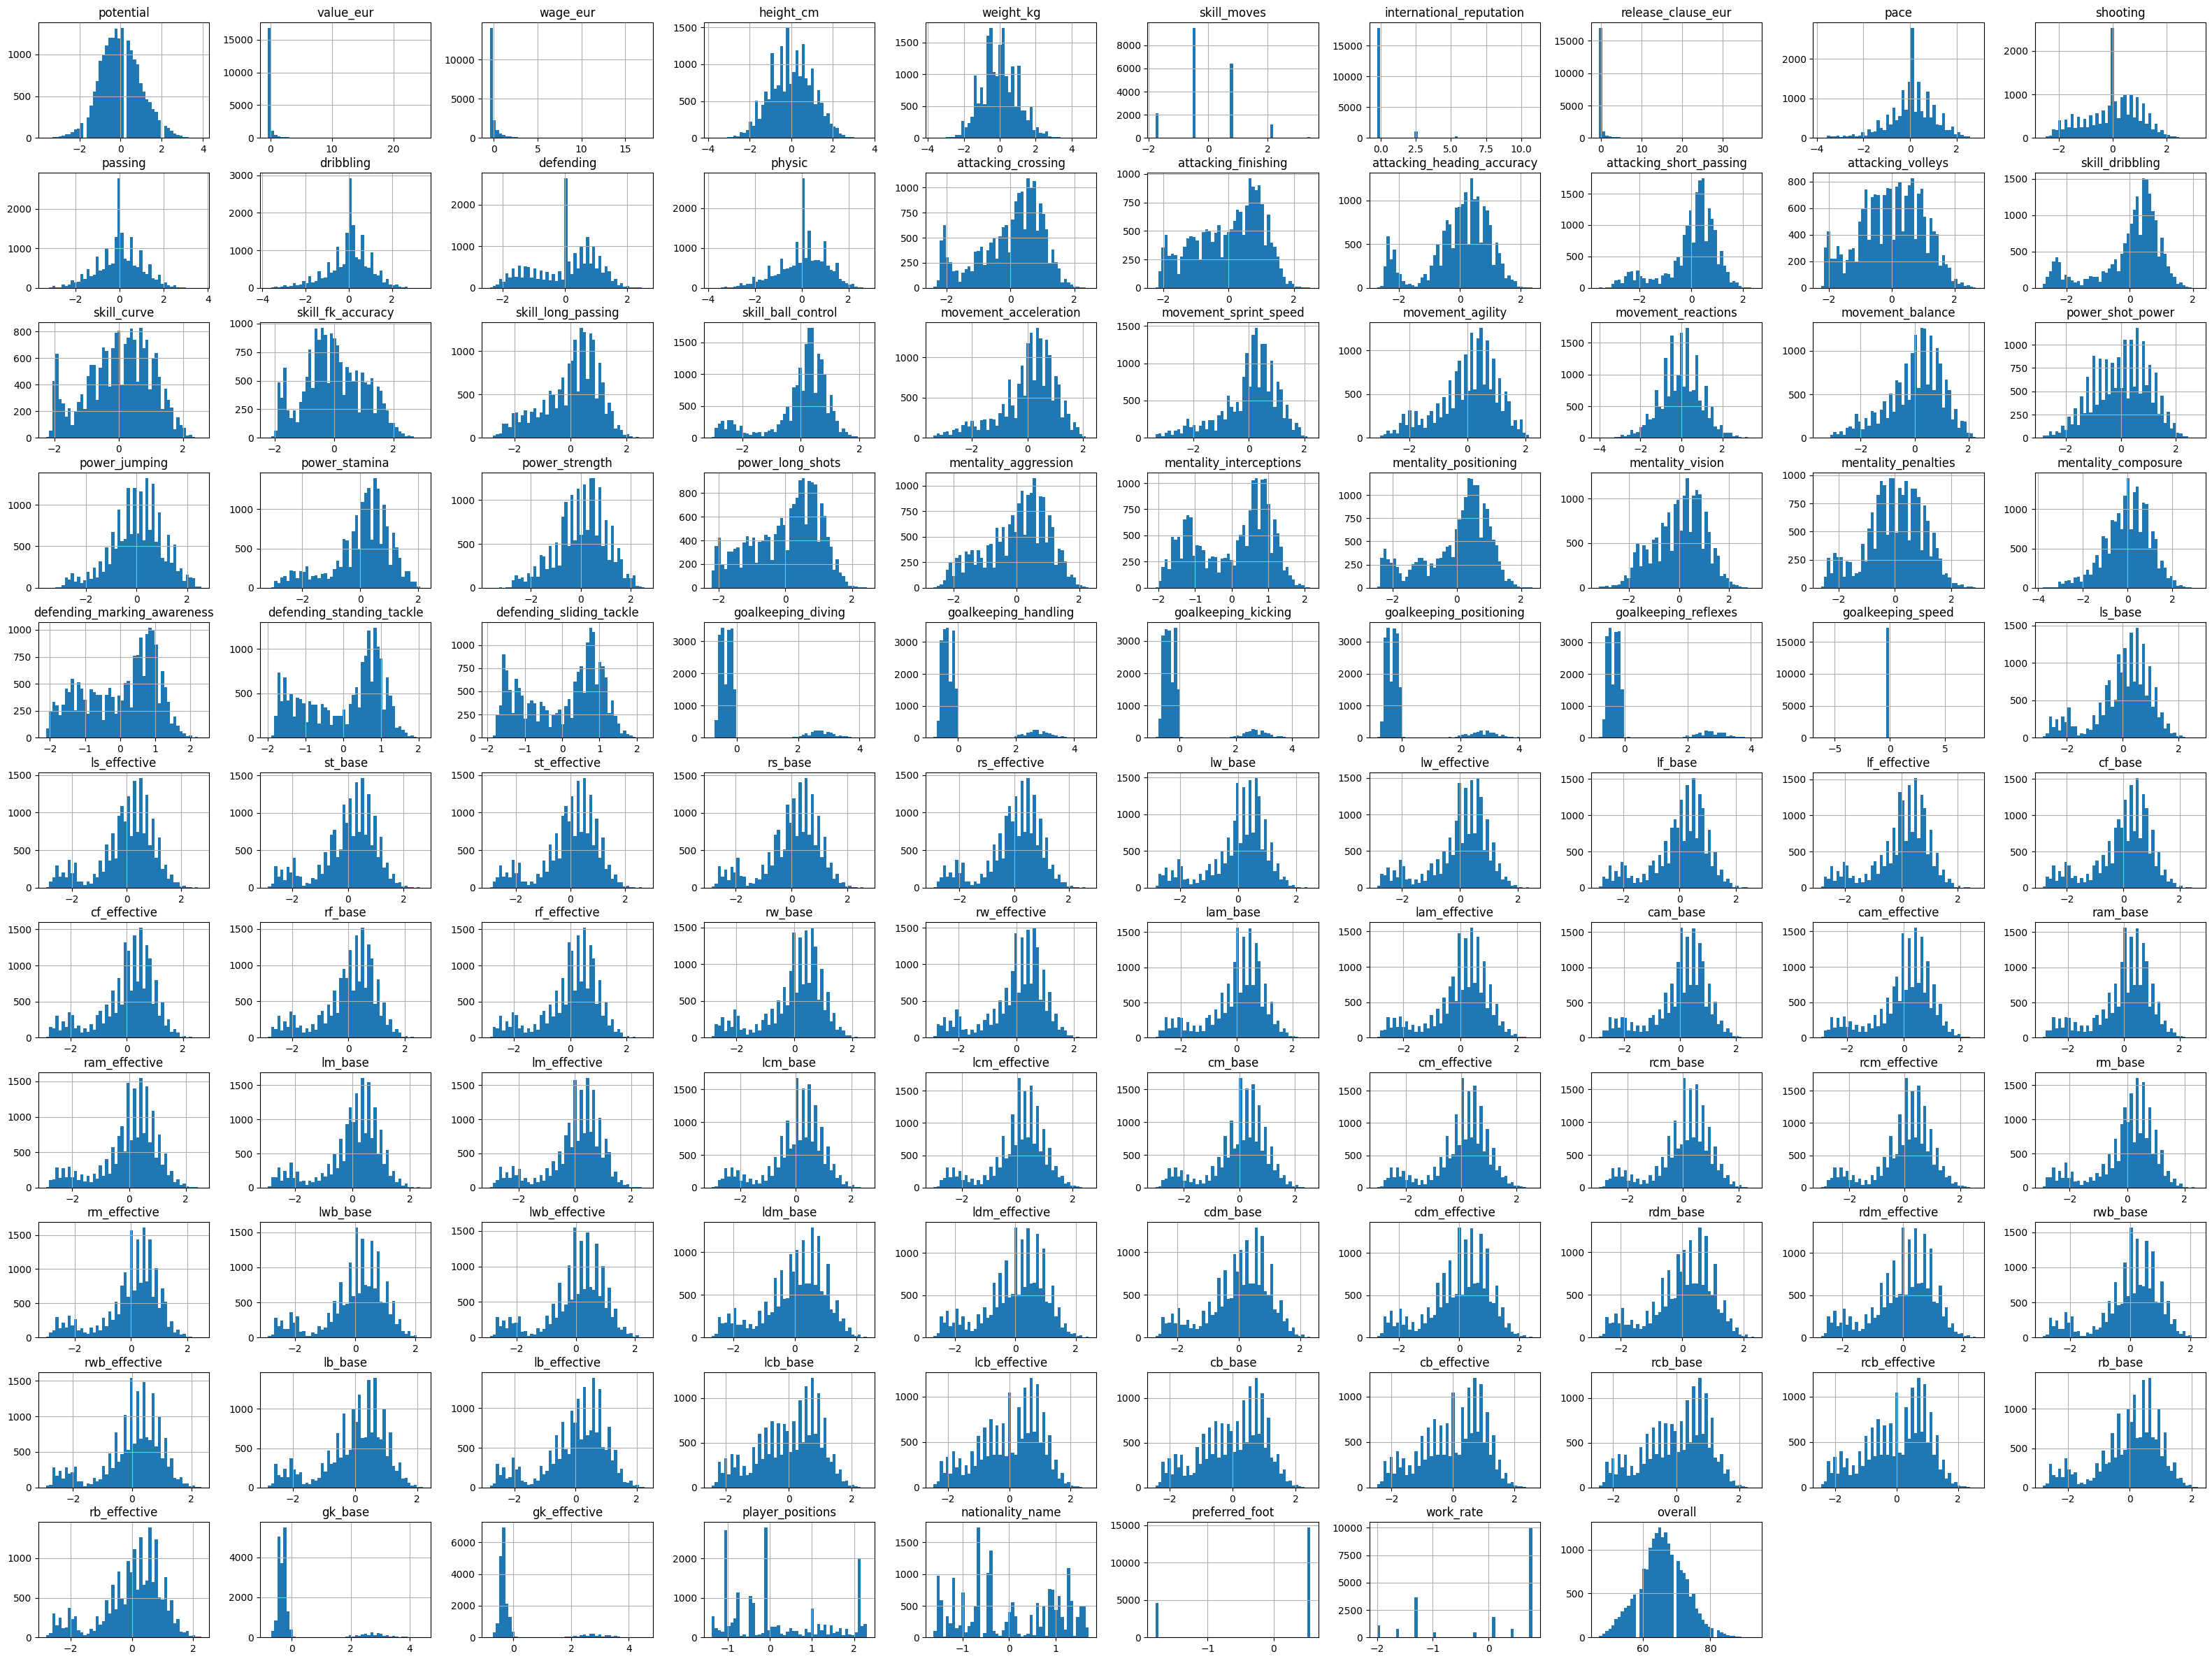

In [ ]:
fifa_22.hist(bins=50,figsize=(40,30))
plt.show()

removing unused columns

In [ ]:
corr=fifa_21.corr(numeric_only=True)['overall'].sort_values(ascending=False)
cdf=pd.DataFrame(corr).transpose()
#columns to drop
globac=[]

for i in cdf.columns:
  if cdf[i]['overall']>correlationLimit:
    globac.append(i)
  else:
    break


fifa_21=fifa_21[globac]
fifa_22=fifa_22[globac]
fifa_22.head(10)


,overall,movement_reactions,mentality_composure,passing,potential,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,...,lam_effective,cam_effective,ram_effective,cam_base,ram_base,lam_base,skill_long_passing,ls_effective,st_effective,rs_effective
0,93.0,3.554438,3.137573,3.493625,3.586563,14.298250,3.433013,15.720109,2.119026,9.759315,...,2.542173,2.542173,2.542173,2.649028,2.649028,2.649028,2.522017,2.655606,2.655606,2.655606
1,92.0,3.444701,2.477402,2.255503,3.422893,19.700805,2.483634,13.191553,2.419094,15.152443,...,2.398304,2.398304,2.398304,2.292848,2.292848,2.292848,1.140882,2.730407,2.730407,2.730407
2,91.0,3.554438,3.055051,2.358680,3.259222,8.068460,2.694607,13.191553,2.719163,5.470804,...,2.182500,2.182500,2.182500,2.079140,2.079140,2.079140,1.601260,2.506005,2.506005,2.506005
3,91.0,3.005754,2.890009,2.977741,3.259222,23.939104,3.327526,13.191553,1.668922,16.387015,...,2.470238,2.470238,2.470238,2.435320,2.435320,2.435320,1.864334,2.281603,2.281603,2.281603
4,91.0,3.225227,2.559923,3.699979,3.259222,23.275274,2.694607,17.237243,2.494112,15.932173,...,2.398304,2.398304,2.398304,2.364084,2.364084,2.364084,2.653554,2.206803,2.206803,2.206803
5,91.0,2.896017,0.826974,0.017863,3.586563,23.867615,0.011155,6.111596,0.093562,14.177782,...,-1.198421,-1.198421,-1.198421,-1.268951,-1.268951,-1.268951,-0.832169,-1.533226,-1.533226,-1.533226
6,91.0,3.444701,2.477402,2.358680,3.913905,37.705917,3.116553,11.168708,2.119026,24.834083,...,-0.910683,-0.910683,-0.910683,-0.984007,-0.984007,-0.984007,1.206650,-1.383625,-1.383625,-1.383625
7,90.0,2.786280,0.992017,0.017863,3.095551,1.838671,0.011155,3.886467,0.768716,1.377224,...,1.103483,1.103483,1.103483,1.010600,1.010600,1.010600,1.009345,1.234395,1.234395,1.234395
8,90.0,2.676543,0.992017,0.017863,3.422893,21.048890,0.011155,12.180131,0.618682,12.488368,...,2.398304,2.398304,2.398304,2.292848,2.292848,2.292848,0.680503,2.580805,2.580805,2.580805
9,90.0,3.334964,2.724966,2.668210,3.095551,24.694849,2.167175,11.674420,2.494112,16.451992,...,2.398304,2.398304,2.398304,2.292848,2.292848,2.292848,2.193176,2.281603,2.281603,2.281603


In [ ]:
fifa_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   overall                  18944 non-null  float64
 1   movement_reactions       18944 non-null  float64
 2   mentality_composure      18944 non-null  float64
 3   passing                  18944 non-null  float64
 4   potential                18944 non-null  float64
 5   release_clause_eur       18944 non-null  float64
 6   dribbling                18944 non-null  float64
 7   wage_eur                 18944 non-null  float64
 8   power_shot_power         18944 non-null  float64
 9   value_eur                18944 non-null  float64
 10  rcm_effective            18944 non-null  float64
 11  lcm_effective            18944 non-null  float64
 12  cm_effective             18944 non-null  float64
 13  cm_base                  18944 non-null  float64
 14  lcm_base              

**Creating and training a model to predict the a player's rating**

spliting the data

In [ ]:
#randomising
fifa_21 = fifa_21.sample(frac=1).reset_index(drop=True)
fifa_22 = fifa_22.sample(frac=1).reset_index(drop=True)

#split
Y_21=fifa_21['overall']
Y_22=fifa_22['overall']
X_21=fifa_21.copy()
X_21.drop(['overall'],axis=1,inplace=True)
X_22=fifa_22.copy()
X_22.drop(['overall'],axis=1,inplace=True)




model training

Using Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_21, Y_21, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(Xtrain, Ytrain)
YPred = rf.predict(Xtest)

In [ ]:
mean_absolute_error(YPred,Ytest), mean_squared_error(YPred,Ytest)

(0.5886883082607548, 1.036241858010029)

Using XGBoost regressor

In [ ]:
import xgboost as xgb

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_21, Y_21, test_size=0.2, random_state=42)

In [ ]:
XGB_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3, colsample_bytree=0.8, subsample=0.8)

In [ ]:
XGB_reg.fit(Xtrain, Ytrain)
Y_pred = XGB_reg.predict(Xtest)

In [ ]:
mean_absolute_error(Y_pred,Ytest), mean_squared_error(Y_pred,Ytest)

(1.1222698305300653, 2.265335672248511)

Using Gradient Boost Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_21, Y_21, test_size=0.2, random_state=42)

In [ ]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [ ]:
gbr.fit(Xtrain, Ytrain)
YPRED = gbr.predict(Xtest)

In [ ]:
mean_absolute_error(YPRED,Ytest), mean_squared_error(YPRED,Ytest)

(1.104761083267613, 2.2007929086823177)

Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingRegressor

In [ ]:
ensemble = VotingRegressor(estimators=[('random_forest', rf), ('xgboost', XGB_reg), ('gradient_boosting', gbr)])

In [ ]:
ensemble.fit(Xtrain, Ytrain)
ensemble_pred = ensemble.predict(Xtest)

In [ ]:
mean_absolute_error(ensemble_pred,Ytest), mean_squared_error(ensemble_pred,Ytest)

(0.8876499034667855, 1.550821970985375)

In [ ]:
pd.DataFrame(X_21.columns)

,0
0,movement_reactions
1,mentality_composure
2,passing
3,potential
4,release_clause_eur
5,dribbling
6,wage_eur
7,power_shot_power
8,value_eur
9,rcm_effective


In [ ]:
for  clf in (rf,gbr,XGB_reg,ensemble):
  clf.fit(X_21,Y_21)
  y_pred=clf.predict(X_22)
  print(clf.__class__.__name__, mean_squared_error(y_pred,Y_22))

RandomForestRegressor 3.6186930297832527
GradientBoostingRegressor 3.6075436033606163
XGBRegressor 3.7079100062442354
VotingRegressor 3.139708233254903


In [ ]:
#for names,score in zip(fifa_21.columns[:-1],rf.feature_importances_):
 # print(names,score)
#X_21

#Cross Validation with grid search#

In [ ]:

from sklearn.model_selection import KFold,GridSearchCV

cv=KFold(n_splits=3)
PARAMETERS=[
{'n_estimators': [3, 10, 30, 50,100],'random_state':[12,22,32,42,52], 'max_features': [2, 3, 4, 6, 8, 10, 12]}
]


model_gs=GridSearchCV(rf,param_grid=PARAMETERS,cv=cv,scoring="accuracy")




In [ ]:
model_gs.fit(Xtrain,Ytrain)

Streaming output truncated to the last 5000 lines.
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 220, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 93, in _check_targets
    raise ValueError(
ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    ret

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 3, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30, 50, 100],
                          'random_state': [12, 22, 32, 42, 52]}],
             scoring='accuracy')

In [ ]:
model_gs.best_estimator_

Ypred=model_gs.predict(Xtest)
mean_absolute_error(Ypred,Ytest)

1.3171461247470746

**Final model Training (Testing with the players_22 dataset)**

In [ ]:
rf_ = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_.fit(X_21,Y_21)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred=rf_.predict(X_22)

In [ ]:
print(rf_.__class__.__name__, mean_absolute_error(y_pred,Y_22))

RandomForestRegressor 1.2143541764124957


**Exporting our model and scaler as pickle files to prepare for deployment**

In [ ]:
import pickle

In [ ]:
with open("FifaDataPrediction.pickle","wb") as f:
  pickle.dump(rf_, f)

In [ ]:
data={
    'or':original,
    'sc':scaler
}
with open("FifaScaler.pickle","wb") as f:
  pickle.dump(data, f)

In [ ]:
Xtest.columns

Index(['movement_reactions', 'mentality_composure', 'passing', 'potential',
       'release_clause_eur', 'dribbling', 'wage_eur', 'power_shot_power',
       'value_eur', 'rcm_effective', 'lcm_effective', 'cm_effective',
       'cm_base', 'lcm_base', 'rcm_base', 'mentality_vision',
       'attacking_short_passing', 'physic', 'lam_effective', 'cam_effective',
       'ram_effective', 'cam_base', 'ram_base', 'lam_base',
       'skill_long_passing', 'ls_effective', 'st_effective', 'rs_effective'],
      dtype='object')

In [ ]:
fifa_22

,overall,movement_reactions,mentality_composure,passing,potential,release_clause_eur,dribbling,wage_eur,power_shot_power,value_eur,...,lam_effective,cam_effective,ram_effective,cam_base,ram_base,lam_base,skill_long_passing,ls_effective,st_effective,rs_effective
0,68.0,0.042860,-1.566147,0.017863,0.804159,-0.040479,0.011155,-0.361507,-1.331765,-0.078270,...,-0.335207,-0.335207,-0.335207,-0.342883,-0.342883,-0.342883,-1.752926,-0.486018,-0.486018,-0.486018
1,75.0,1.579175,1.487145,0.191967,1.131501,0.110062,1.323283,1.054485,1.593905,0.597495,...,0.887679,0.887679,0.887679,0.868128,0.868128,0.868128,0.154356,0.635990,0.635990,0.635990
2,67.0,0.042860,0.579410,0.501498,-0.177866,-0.224308,0.901337,-0.310936,0.918751,-0.195230,...,0.815745,0.815745,0.815745,0.796892,0.796892,0.796892,0.483198,0.635990,0.635990,0.635990
3,70.0,0.920755,1.652188,0.398321,-0.177866,-0.306011,0.479391,-0.260365,1.293837,-0.247212,...,0.887679,0.887679,0.887679,0.868128,0.868128,0.868128,0.154356,0.710791,0.710791,0.710791
4,57.0,-1.054508,-0.658411,-1.871569,-1.159891,-0.379032,-1.735826,-0.412078,-1.856885,-0.338180,...,0.096400,0.096400,0.096400,0.084533,0.084533,0.084533,-1.292548,-0.112015,-0.112015,-0.112015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,55.0,-1.383718,-1.566147,-2.077922,-0.996220,-0.395270,-2.474231,-0.412078,-1.181731,-0.341429,...,-0.479076,-0.479076,-0.479076,-0.485355,-0.485355,-0.485355,-1.095242,-0.710420,-0.710420,-0.710420
19235,67.0,-0.505824,0.579410,-0.736624,-0.177866,-0.193670,-0.469988,-0.260365,1.668922,-0.208225,...,-0.694879,-0.694879,-0.694879,-0.699063,-0.699063,-0.699063,-1.292548,-0.486018,-0.486018,-0.486018
19236,66.0,-0.286350,-0.163283,-0.014386,-0.668878,-0.254947,-0.048042,-0.260365,-0.656610,-0.256958,...,0.599941,0.599941,0.599941,0.583184,0.583184,0.583184,-0.108717,0.785592,0.785592,0.785592
19237,63.0,-0.066877,-0.823454,-0.014386,-1.323562,-0.364734,0.268418,-0.310936,0.543665,-0.312189,...,0.312203,0.312203,0.312203,0.369476,0.369476,0.369476,0.417430,0.112386,0.112386,0.112386


In [ ]:
rf_.predict(pd.DataFrame(np.array([[95
,95
,92
,94
,195900000
,96
,560000
,86
,5000000
,93
,93
,93
,87
,87
,94
,90
,90
,94
,94
,94
,94
,94
,94
,94
,92
,94
,94
,94]]).astype(np.float64))),Y_22[1800]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


(array([92.07]), 67.0)

In [ ]:
X_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   movement_reactions       19239 non-null  float64
 1   mentality_composure      19239 non-null  float64
 2   passing                  19239 non-null  float64
 3   potential                19239 non-null  float64
 4   release_clause_eur       19239 non-null  float64
 5   dribbling                19239 non-null  float64
 6   wage_eur                 19239 non-null  float64
 7   power_shot_power         19239 non-null  float64
 8   value_eur                19239 non-null  float64
 9   rcm_effective            19239 non-null  float64
 10  lcm_effective            19239 non-null  float64
 11  cm_effective             19239 non-null  float64
 12  cm_base                  19239 non-null  float64
 13  lcm_base                 19239 non-null  float64
 14  rcm_base              

Confidence Level

In [ ]:
!pip install forestci

In [ ]:
import forestci as fci

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [ ]:
variance=fci.random_forest_error(rf_,X_21,X_22)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without featu

In [ ]:
sd=np.mean(np.sqrt(variance))
sd

4.361068390461162

In [ ]:
with open("Stats.pickle","wb") as f:
  pickle.dump(sd, f)

In [ ]:
ci_upper_bound = rf_.predict(Xtest) + 1.96 * sd
ci_lower_bound = rf_.predict(Xtest) - 1.96 * sd

In [ ]:
ci_upper_bound

array([72.71525707, 75.09878987, 74.7575915 , ..., 82.35935738,
       90.64161505, 81.24907353])